In [1]:
def energyQbb(qbb,a,b,sample_size):
    import numpy as np
    samples = qbb*np.random.beta(a, b, sample_size)
    return samples

def xyzGenerator(rmin,rmax,zmin,zmax,sample_size):

    # Generate random points within the cylinder
    theta = np.random.uniform(0, 2*np.pi, sample_size)
    r = np.sqrt(np.random.uniform(rmin, rmax**2, sample_size))
    z = np.random.uniform(zmin, zmax, sample_size)

    # Compute x,y,z coordinates of the points
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y, z

def thetaPhiGenerator(sample_size):
    theta = np.random.uniform(0, 2*np.pi, sample_size)
    phi = np.random.uniform(0, np.pi, sample_size)
    return theta, phi

In [2]:
### Environment variables
Qbb  = 3525.4  #keV
rmin =  0      # cm
rmax =  68.75  # cm
zmin = -150    # cm
zmax =  150    # cm

# to be optimize?
a = 2.6
b = 3

In [3]:
import numpy as np

nfiles      = 10
sample_size = 10000

for nfile in range(nfiles):

    nevent           = np.arange(0, sample_size, 1, dtype=int)             # index
    particleID       = 11*np.ones(sample_size,dtype=int)                   # beta
    energy           = energyQbb(Qbb,a,b,sample_size)                      # Initial Energy [keV]
    posx, posy, posz = xyzGenerator(rmin,rmax,zmin,zmax,sample_size)       # Initial position X,Y,Z [cm] 
    theta,phi        = thetaPhiGenerator(sample_size)                      # Direction [grad]
    
    # Stack arrays horizontally
    stacked = np.column_stack((nevent, particleID, energy, posx, posy, posz, theta, phi))

    # Save stacked arrays to text file
    np.savetxt(('betaDistribution_%04d.txt' % nfile), stacked, fmt=('%d', '%d', '%.3f', '%.2f', '%.2f', '%.2f', '%f', '%f'))

## TESTING PLOTS

In [2]:
def pltcosmetics2():
    import matplotlib.pyplot as plt
    from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter,AutoMinorLocator)

    font = 20

    fig, ax = plt.subplots(figsize=(10, 7))

    #plt.title("Analisys over the Run 4320 t_variable",fontsize =font)          
    #plt.legend(["                   Entries:","NNC                %d" %(ent[0]),"iDBSCAN          %d" %(ent[1])],fontsize=font)
    plt.xlabel("Qbb [keV]",fontsize=font, horizontalalignment='right', x=1.0)
    plt.ylabel("Counts",fontsize=font, horizontalalignment='right', y=1.0)            
    plt.grid(color='gray', linestyle=':', alpha = 0.5)
    #plt.xlim([0,4000])
    #plt.ylim([0.5, 10000])
    #plt.yscale("log")

    ax = plt.gca()
    ax.tick_params(axis='both', labelcolor='k',labelsize ="xx-large")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    #ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='major',direction="in", length=10, width=1)
    ax.tick_params(which='minor',direction="in", length=5, width=1)

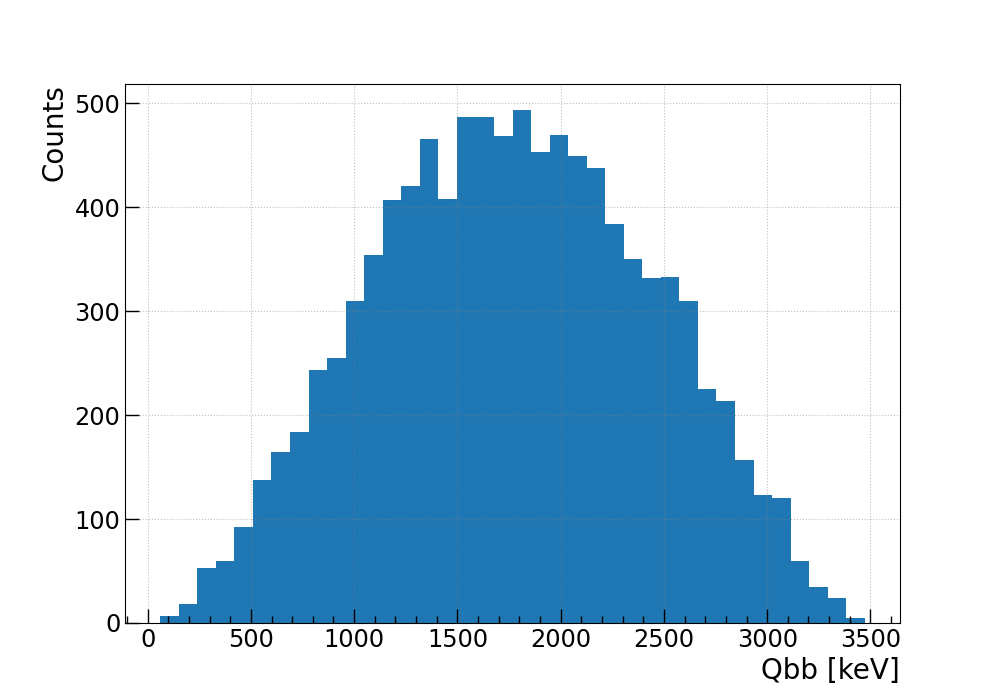

In [8]:
### Generating energy Qbb = 3.525 MeV

samples = energyQbb(Qbb,a,b,sample_size)
posx, posy, posz = xyzGenerator(rmin,rmax,zmin,zmax,sample_size)
theta,phi = thetaPhiGenerator(sample_size)


%matplotlib ipympl
## Plot histogram
from matplotlib import pyplot as plt
cor = 'dimgray'
face = 'gray'
lwidth = 3

bins = "auto"

pltcosmetics2()
plt.hist(samples, bins)
plt.show()


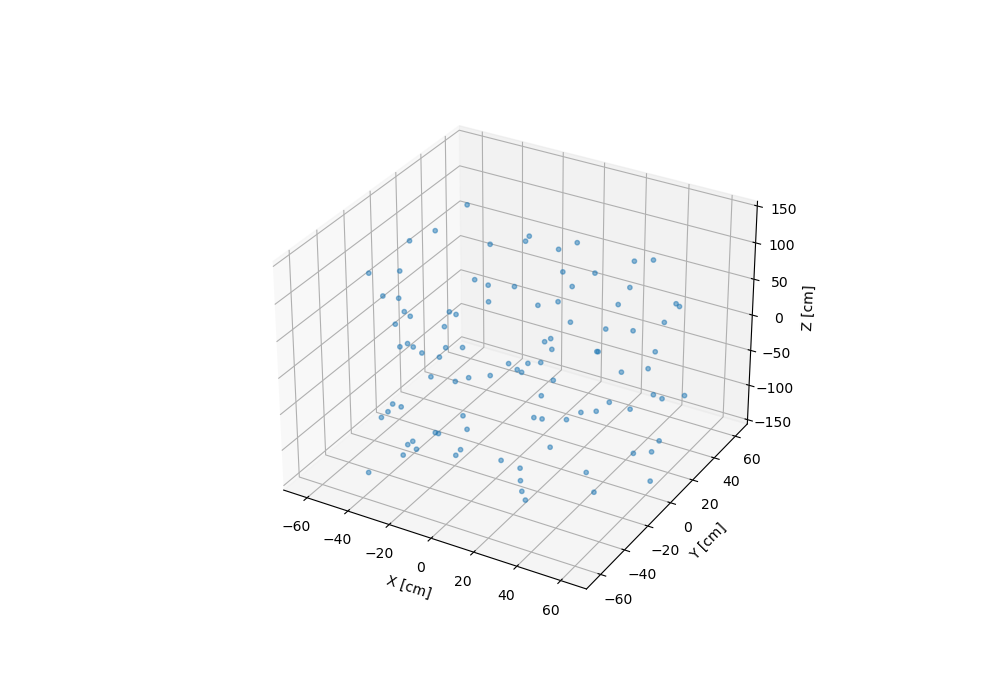

In [14]:
## Generating X, Y and Z inside WLSR
## Centered on 0,0
## cm

rmin =  0
rmax =  68.75
zmin = -150
zmax =  150

sample_size = 100

posx, posy, posz = xyzGenerator(rmin,rmax,zmin,zmax,sample_size)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(posx, posy, posz, s=10, alpha=0.5)

# Set axis labels and limits
ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_zlabel('Z [cm]')
ax.set_xlim([-rmax, rmax])
ax.set_ylim([-rmax, rmax])
ax.set_zlim([zmin, zmax])

# Show the plot
plt.show()

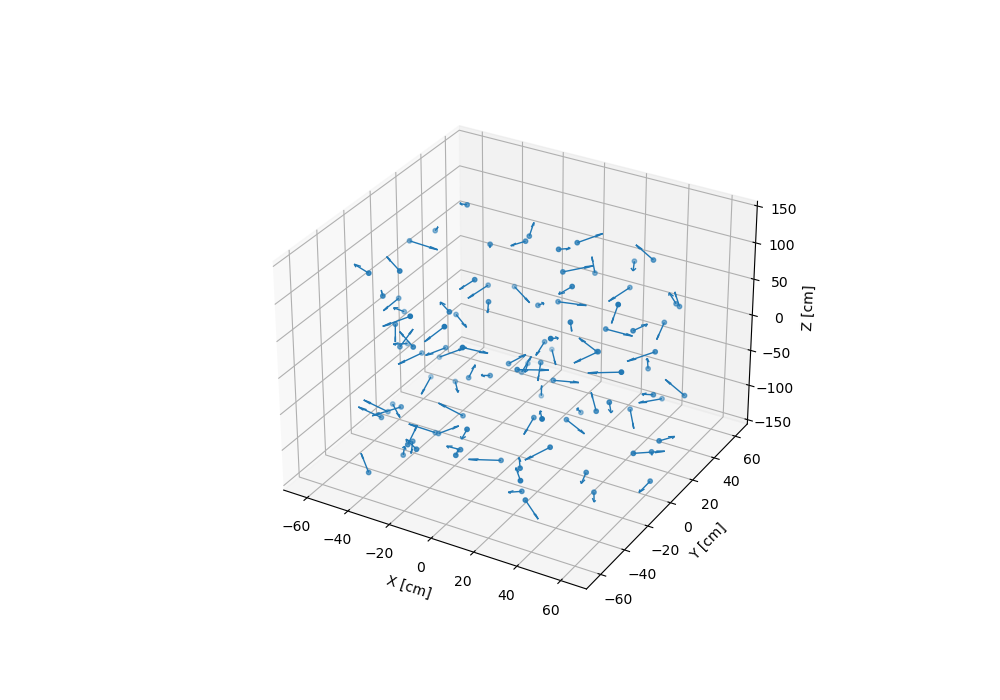

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random spherical coordinates
theta,phi = thetaPhiGenerator(sample_size)

# Convert spherical coordinates to Cartesian coordinates
x = rmax * np.sin(phi) * np.cos(theta)
y = rmax * np.sin(phi) * np.sin(theta)
z = rmax * np.cos(phi)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot vectors
ax.scatter(posx, posy, posz, s=10)
ax.quiver(posx, posy, posz, x, y, z, linewidth=1, length=0.2)

# Set axis labels and limits
ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_zlabel('Z [cm]')
ax.set_xlim([-rmax, rmax])
ax.set_ylim([-rmax, rmax])
ax.set_zlim([zmin, zmax])

# Show the plot
plt.show()
